## Survei Tinggi Badan

#### [Statistik Deskriptif Data Survei](https://academy.dqlab.id/main/livecode/363/798/4155?pr=)

In [1]:
# singkronisasi ke g-drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Gunakan kutip dua untuk setiap string
# Import numpy sebagai aliasnya np
# dan import stats dari scipy
import numpy as np
from scipy import stats


# Baca data survei_tinggi_badan.txt dengan numpy loadtxt
tinggi_badan = np.loadtxt("/content/drive/MyDrive/AL. Lab/Sanca/Datasets/survei_tinggi_badan.txt", skiprows=1)

# Tentukan statistik deskriptif tinggi badan 
desc_stat = stats.describe(tinggi_badan)
print("Statistik deskriptif tinggi badan:\n", desc_stat)

Statistik deskriptif tinggi badan:
 DescribeResult(nobs=250, minmax=(143.0, 177.0), mean=161.352, variance=36.32539759036144, skewness=-0.13124444608329433, kurtosis=-0.044516092057662604)


#### [Histogram Data Survei](https://academy.dqlab.id/main/livecode/363/798/4156?pr=)

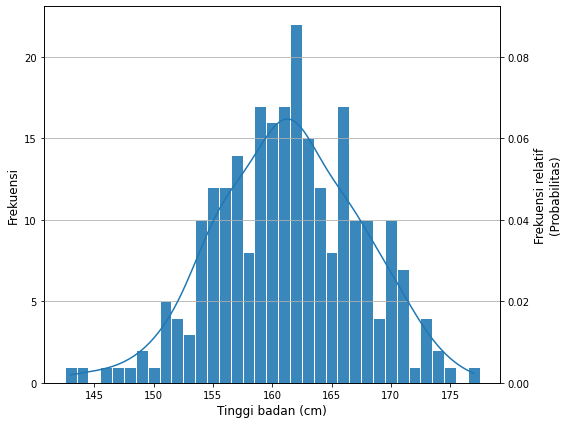

In [4]:
# Import matplotlib.pyplot dan seaborn sebagai aliasnya plt dan sns masing-masingnya
import matplotlib.pyplot as plt
import seaborn as sns


# Buat figure sebagai canvas dengan ukuran 8 in x 6 in
fig, ax = plt.subplots(figsize=(8, 6))

# plotkan histogram untuk frekuensi 
sns.histplot(x=tinggi_badan, binwidth=1, binrange=(tinggi_badan.min()-0.5, tinggi_badan.max()+0.5), ec="w", ax=ax)

# buat sumbu berikutnya agar frekuensi relatif dapat dijadikann pada satu plot
ax1 = ax.twinx()

# plotkan histogram untuk frekuensi relatif
sns.histplot(x=tinggi_badan, stat="probability", binwidth=1, binrange=(tinggi_badan.min()-0.5, tinggi_badan.max()+0.5), kde=True, ec="w", ax=ax1)

# set label
ax.set_xlabel("Tinggi badan (cm)", fontsize=12)
ax.set_ylabel("Frekuensi", fontsize=12)
ax1.set_ylabel("Frekuensi relatif\n(Probabilitas)", fontsize=12)
ax1.grid(axis="y")
plt.tight_layout()
plt.show()

#### [Histogram Kumulatif Data Survei](https://academy.dqlab.id/main/livecode/363/798/4157?pr=)

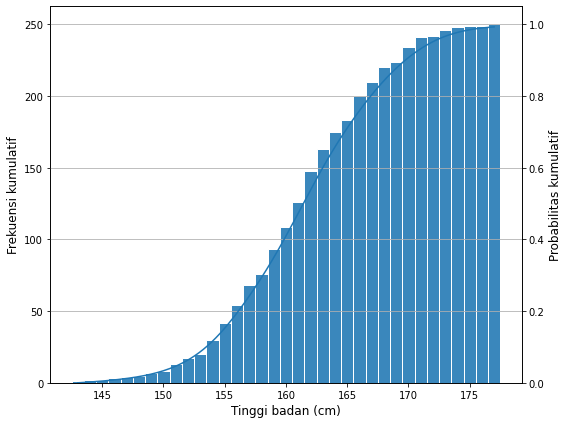

In [5]:
# Buat figure sebagai canvas dengan ukuran 8 in x 6 in
fig, ax = plt.subplots(figsize=(8, 6))

# plotkan histogram untuk frekuensi 
sns.histplot(x=tinggi_badan, binwidth=1, binrange=(tinggi_badan.min()-0.5, tinggi_badan.max()+0.5), cumulative=True, ec="w", ax=ax)

# buat sumbu berikutnya agar frekuensi relatif dapat dijadikann pada satu plot
ax1 = ax.twinx()

# plotkan histogram untuk frekuensi relatif
sns.histplot(x=tinggi_badan, stat="probability", binwidth=1, binrange=(tinggi_badan.min()-0.5, tinggi_badan.max()+0.5), cumulative=True, kde=True, ec="w", ax=ax1)

# set label
ax.set_xlabel("Tinggi badan (cm)", fontsize=12) 
ax.set_ylabel("Frekuensi kumulatif", fontsize=12)
ax1.set_ylabel("Probabilitas kumulatif", fontsize=12)
ax1.grid(axis="y")
plt.tight_layout()
plt.show()

#### [Visualisasi Empirical CDF Data Survei](https://academy.dqlab.id/main/livecode/363/798/4158?pr=)

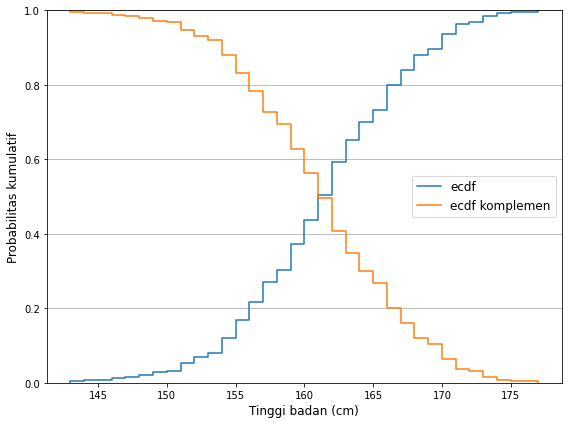

In [6]:
# Buat figure sebagai canvas dengan ukuran 8 in x 6 in
fig, ax = plt.subplots(figsize=(8, 6))

# plotkan ecdf
sns.ecdfplot(x=tinggi_badan, ax=ax)

# plotkan ecdf komplemen
sns.ecdfplot(x=tinggi_badan, complementary=True, ax=ax)

# set label
ax.set_xlabel("Tinggi badan (cm)", fontsize=12)
ax.set_ylabel("Probabilitas kumulatif", fontsize=12)
ax.grid(axis="y")
plt.legend(["ecdf", "ecdf komplemen"], fontsize=12)
plt.tight_layout()
plt.show()

## Distribusi Normal

#### [Menampilkan Dua Kurva: PDF dan CDF](https://academy.dqlab.id/main/livecode/363/799/4165?pr=)

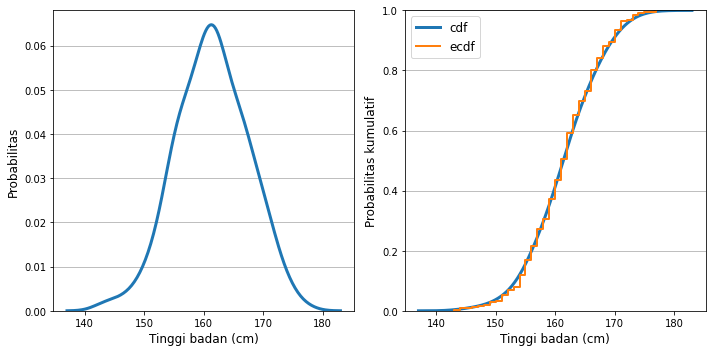

In [7]:
# Buat figure sebagai canvas dengan ukuran 10 in x 5 in
# dengan dua suplots (2 kolom)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plotkan pdf pada subplot pertama: axs[0]
sns.kdeplot(x=tinggi_badan, lw=3, ax=axs[0])

# plotkan cdf dan ecdf pada subplot kedua: axs[1]
sns.kdeplot(x=tinggi_badan, cumulative=True, lw=3, ax=axs[1])
sns.ecdfplot(x=tinggi_badan, lw=2, ax=axs[1])

# set label
axs[0].set_ylabel("Probabilitas", fontsize=12)
for ax in axs:
    ax.set_xlabel("Tinggi badan (cm)", fontsize=12)
    ax.grid(axis="y")
ax.set_ylabel("Probabilitas kumulatif", fontsize=12)
ax.legend(["cdf", "ecdf"], fontsize=12)
plt.tight_layout()
plt.show()

#### [Menentukan Probabilitas Satu Nilai](https://academy.dqlab.id/main/livecode/363/799/4166?pr=)

In [8]:
# Importlah norm dari scipy.stats
from scipy.stats import norm


# Rata-rata dan standar deviasi unbiased tinggi_badan
tb_mean = tinggi_badan.mean()
tb_std = tinggi_badan.std(ddof=1)

# Tentukanlah nilai probabilitas dan probabilitas kumulatif menggunakan 
# distribusi normal untuk tinggi badan, x = 165 cm
x = 165
pdf_x = norm.pdf(x, loc=tb_mean, scale=tb_std)
cdf_x = norm.cdf(x, loc=tb_mean, scale=tb_std)
print("Probabilitas x = %d cm adalah %.4f." % (x, pdf_x))
print("Probabilitas kumulatif x = %d cm adalah %.4f." % (x, cdf_x))

Probabilitas x = 165 cm adalah 0.0551.
Probabilitas kumulatif x = 165 cm adalah 0.7275.


#### [Menentukan Probabilitas Dua Nilai](https://academy.dqlab.id/main/livecode/363/799/4167?pr=)

In [10]:
# Tentukanlah nilai probabilitas dan probabilitas kumulatif menggunakan 
# distribusi normal untuk tinggi badan, 150 cm dan 170 cm
x = [150, 170]
pdf_x = norm.pdf(x, loc=tb_mean, scale=tb_std)
cdf_x = norm.cdf(x, loc=tb_mean, scale=tb_std)
for x_item, pdf, cdf in zip(x, pdf_x, cdf_x):
    print("Probabilitas x = %d cm adalah %.4f." % (x_item, pdf))
    print("Probabilitas kumulatif x = %d cm adalah %.4f." % (x_item, cdf))

Probabilitas x = 150 cm adalah 0.0112.
Probabilitas kumulatif x = 150 cm adalah 0.0298.
Probabilitas x = 170 cm adalah 0.0236.
Probabilitas kumulatif x = 170 cm adalah 0.9243.


#### [Data Survei yang Terdistribusi Normal](https://academy.dqlab.id/main/livecode/363/799/4169?pr=)

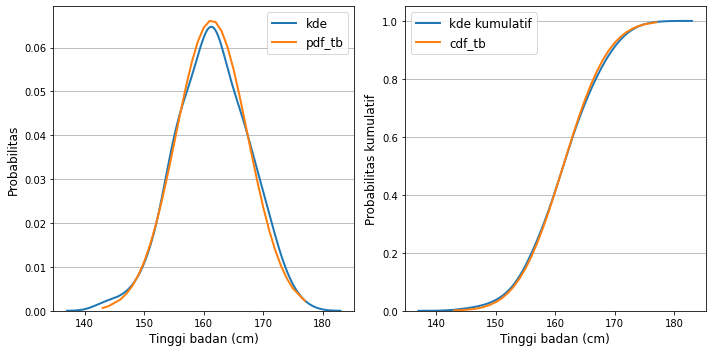

In [12]:
# pdf dan cdf berdasarkan data tinggi badan
pdf_tb = norm.pdf(tinggi_badan, loc=tb_mean, scale=tb_std)
cdf_tb = norm.cdf(tinggi_badan, loc=tb_mean, scale=tb_std)

# Buat figure sebagai canvas dengan ukuran 10 in x 5 in
# dengan dua suplots (2 kolom)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plotkan kde dan pdf_tb pada subplot pertama: axs[0]
sns.kdeplot(x=tinggi_badan, lw=2, ax=axs[0])
sns.lineplot(x=tinggi_badan, y=pdf_tb, lw=2, ax=axs[0])
axs[0].legend(["kde", "pdf_tb"], fontsize=12)

# plotkan kde kumulatif dan cdf_tb pada subplot kedua: axs[1]
sns.kdeplot(x=tinggi_badan, cumulative=True, lw=2, ax=axs[1])
sns.lineplot(x=tinggi_badan, y=cdf_tb, lw=2, ax=axs[1])
axs[1].legend(["kde kumulatif", "cdf_tb"], fontsize=12)

# set label
axs[0].set_ylabel("Probabilitas", fontsize=12)
for ax in axs:
    ax.set_xlabel("Tinggi badan (cm)", fontsize=12)
    ax.grid(axis="y")
ax.set_ylabel("Probabilitas kumulatif", fontsize=12)
plt.tight_layout()
plt.show()

## Mini Project

#### [Problem 1](https://academy.dqlab.id/main/livecode/363/828/4170?pr=)

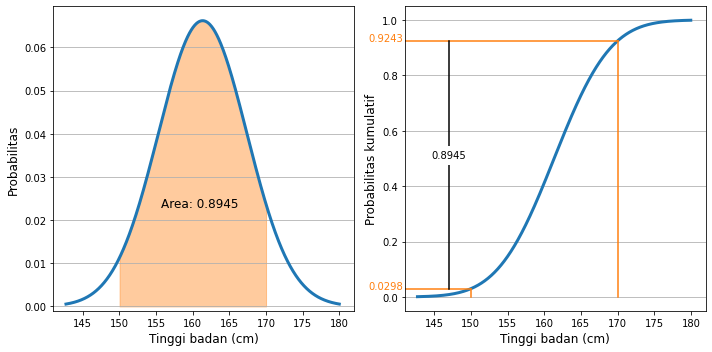

In [34]:
# Buat data tinggi badan yang terdistribusi normal dengan 
# rata-rata pada tb_mean dan standar deviasi unbiased pada tb_std
# untuk menghasilkan 1001 titik data baru berdasarkan nilai kuantilnya
tb = np.linspace(norm.ppf(0.001, loc=tb_mean, scale=tb_std), 
                 norm.ppf(0.999, loc=tb_mean, scale=tb_std), 1001)

# kurva pdf dan kurva cdf berdasarkan data tb
pdf_tb = norm.pdf(tb, loc=tb_mean, scale=tb_std)
cdf_tb = norm.cdf(tb, loc=tb_mean, scale=tb_std)

# Nilai probabilitas dan probabilitas kumulatif menggunakan 
# distribusi normal untuk tinggi badan, 150 cm dan 170 cm
x = [150, 170]
pdf_x = norm.pdf(x, loc=tb_mean, scale=tb_std)
cdf_x = norm.cdf(x, loc=tb_mean, scale=tb_std)

# Buat figure sebagai canvas dengan ukuran 10 in x 5 in
# dengan dua suplots (2 kolom)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# plotkan kurva pdf_tb pada subplot pertama: axs[0]
sns.lineplot(x=tb, y=pdf_tb, lw=3, ax=axs[0])
axs[0].fill_between(tb[(tb>=x[0]) & (tb<=x[1])], 
                    pdf_tb[(tb>=x[0]) & (tb<=x[1])], 
                    color="tab:orange", alpha=0.4)
axs[0].text(161, 0.023, "Area: %.4f" % (cdf_x[1]-cdf_x[0]), ha="center", fontsize=12)

# plotkan kurva cdf_tb pada subplot kedua: axs[1]
sns.lineplot(x=tb, y=cdf_tb, lw=3, ax=axs[1])
for i, _x in enumerate(x):
    axs[1].plot([_x, _x], [0, cdf_x[i]], color="tab:orange")
    axs[1].plot([140, _x], [cdf_x[i], cdf_x[i]], color="tab:orange")
    axs[1].text(140.8, cdf_x[i], "%.4f" % cdf_x[i], color="tab:orange", ha="right")
    
axs[1].plot([147, 147], cdf_x, color="black")
axs[1].text(147, 0.5, "%.4f" % (cdf_x[1]-cdf_x[0]), color="black", ha="center", backgroundcolor="white")

# set label
axs[0].set_ylabel("Probabilitas", fontsize=12)
axs[0].set_ylim(bottom=-0.001)
for ax in axs:
    ax.set_xlabel("Tinggi badan (cm)", fontsize=12)
    ax.set_xlim([141,182])
    ax.grid(axis="y")
ax.set_ylabel("Probabilitas kumulatif", fontsize=12)
plt.tight_layout()
plt.show()

#### [Problem 2](https://academy.dqlab.id/main/livecode/363/828/4171?pr=)

In [35]:
for i in range(1, 4):
    x = tb_mean + np.array([-i, i]) * tb_std
    cdf_x = norm.cdf(x, loc=tb_mean, scale=tb_std)
    print("Area di bawah kurva pdf (%ds s/d %ds)" % (-i, i))
    print("  pdf(%.4f <= x <= %.4f) = %.4f.\n" % (*x, np.diff(cdf_x)))

Area di bawah kurva pdf (-1s s/d 1s)
  pdf(155.3249 <= x <= 167.3791) = 0.6827.

Area di bawah kurva pdf (-2s s/d 2s)
  pdf(149.2979 <= x <= 173.4061) = 0.9545.

Area di bawah kurva pdf (-3s s/d 3s)
  pdf(143.2708 <= x <= 179.4332) = 0.9973.

